In [3]:
#Dependencies
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb


# Importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Get Cleaned Data
datafile = 'Resources/IowaCleanData.csv'
df = pd.read_csv(datafile)

df.head()

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.0,31770,6,1960,1960,112.0,639.0,441.0,1080.0,1656,...,1656,1,0,7,2,2.0,528.0,210,62,215000
1,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,896,1,0,5,0,1.0,730.0,140,0,105000
2,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1329,1,1,6,0,1.0,312.0,393,36,172000
3,93.0,11160,7,1968,1968,0.0,1065.0,1045.0,2110.0,2110,...,2110,2,1,8,2,2.0,522.0,0,0,244000
4,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1629,2,1,6,1,2.0,482.0,212,34,189900


In [5]:
#Set X and y values from features and reshape
X = df[['Lot Frontage','Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1','Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF']]
y = df['SalePrice'].values.reshape(-1, 1)

print(X.shape,y.shape)




(2930, 20) (2930, 1)


In [6]:
#Set training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Create the XG Boost Model and fit to training
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)


xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [7]:
#Score the data
training_score = xgb_model.score(X_train, y_train)
testing_score = xgb_model.score(X_test, y_test)

print(f'Testing Score: {testing_score}')

Testing Score: 0.9050063673302509


In [17]:
#Make Predictions
predictions = xgb_model.predict(X_test)


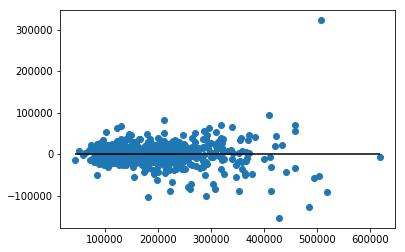

In [14]:
#Plot Residuals
plt.scatter(predictions, predictions - y_test.flatten())

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.show()

In [21]:
#Show how predictions match up to actuals (y_test)

predict_df = pd.DataFrame({'Predictions': predictions.astype(int), 
              'Actuals': y_test.flatten(),
              'Difference': predictions - y_test.flatten(),
              '% Difference': ((predictions - y_test.flatten())/ y_test.flatten()).round(3)})


predict_df.to_csv('Resources/XGBoost_Results.csv', index=False)


predict_df


,Predictions,Actuals,Difference,% Difference
0,199882,161000,38882.625000,0.242
1,104077,116000,-11922.531250,-0.103
2,195276,196500,-1223.578125,-0.006
3,121886,123600,-1713.546875,-0.014
4,118787,126000,-7212.648438,-0.057
5,171867,174190,-2322.921875,-0.013
6,181941,200000,-18058.687500,-0.090
7,149112,148500,612.515625,0.004
8,87212,88750,-1537.187500,-0.017
9,363519,409900,-46380.937500,-0.113


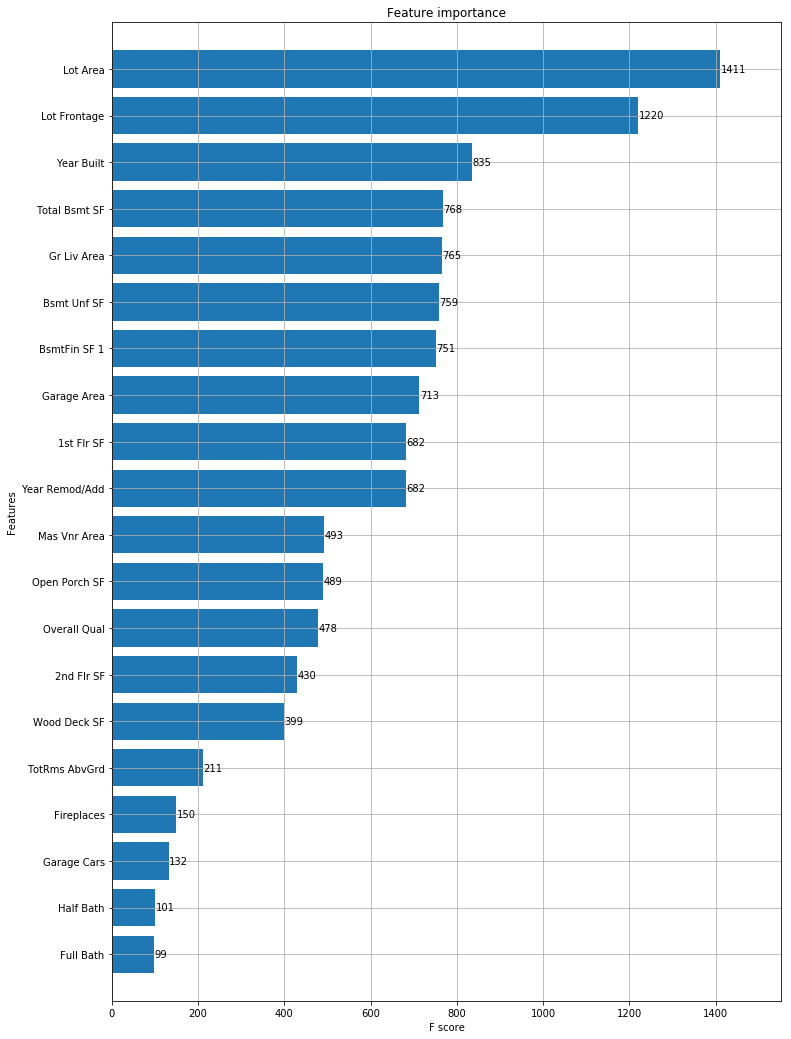

In [20]:
#Use XG Boost to show what effect each feature has on the housing price
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=150)

# plot the important features
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=30, height=0.8, ax=ax)
plt.save_fig('Images/XGBoost_Feature_Imp.png')
plt.show()